In [57]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer
from sklearn.metrics import r2_score 
import joblib
import os

In [58]:
dataset = pd.read_csv('../data/job.csv')
dataset.head(10)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics
5,AI00006,AI Architect,123574,EUR,SE,CT,Germany,M,Germany,50,"Data Visualization, R, SQL, Linux",Associate,7,Healthcare,2024-08-31,2024-10-04,819,5.9,Neural Networks Co
6,AI00007,Principal Data Scientist,79670,GBP,MI,FL,United Kingdom,S,United Kingdom,0,"R, Docker, MLOps",Associate,3,Gaming,2024-12-29,2025-02-28,1936,6.3,DataVision Ltd
7,AI00008,NLP Engineer,70640,EUR,EN,FL,France,L,France,0,"Python, SQL, Computer Vision, Java, Azure",Master,0,Healthcare,2024-06-07,2024-07-01,1286,7.6,Cloud AI Solutions
8,AI00009,Data Analyst,160710,USD,SE,CT,Singapore,L,Singapore,0,"Hadoop, Git, Mathematics, Python",PhD,7,Government,2024-11-04,2024-11-24,551,9.3,Quantum Computing Inc
9,AI00010,AI Software Engineer,102557,USD,SE,PT,Austria,M,Austria,0,"MLOps, GCP, Scala, Azure, Linux",Master,5,Government,2024-10-20,2024-11-06,2340,5.8,Cloud AI Solutions


In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [60]:
dataset.isnull().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [61]:
dataset.select_dtypes(['int64','float64']).cov()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
salary_usd,3.631381e+09,33759.925981,246486.155372,-315663.226841,86.139465
remote_ratio,3.375993e+04,1665.677434,3.467718,105.219627,0.185887
years_experience,2.464862e+05,3.467718,30.755540,-24.046560,-0.058533
job_description_length,-3.156632e+05,105.219627,-24.046560,331922.416104,5.636844
benefits_score,8.613946e+01,0.185887,-0.058533,5.636844,2.105023


In [62]:
dataset.select_dtypes(['int64','float64']).corr()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
salary_usd,1.000000,0.013727,0.737556,-0.009092,0.000985
remote_ratio,0.013727,1.000000,0.015321,0.004475,0.003139
years_experience,0.737556,0.015321,1.000000,-0.007526,-0.007275
job_description_length,-0.009092,0.004475,-0.007526,1.000000,0.006744
benefits_score,0.000985,0.003139,-0.007275,0.006744,1.000000


In [63]:
dataset.dropna(subset=["salary_usd", "experience_level", "job_title", "required_skills", "company_location"], inplace=True)

In [64]:
dataset['salary_usd'].describe()

count     15000.000000
mean     115348.965133
std       60260.940438
min       32519.000000
25%       70179.750000
50%       99705.000000
75%      146408.500000
max      399095.000000
Name: salary_usd, dtype: float64

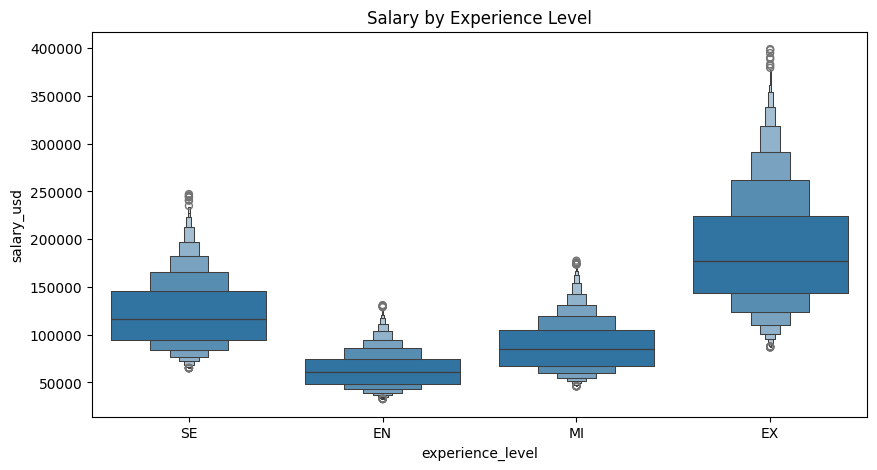

In [65]:
plt.figure(figsize=(10, 5))
sns.boxenplot(x="experience_level", y="salary_usd", data = dataset)
plt.title("Salary by Experience Level")
plt.show()

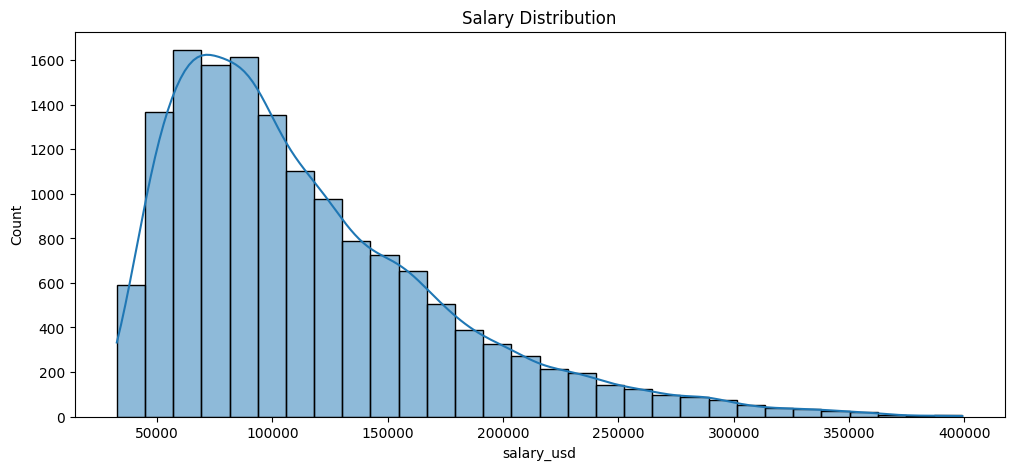

In [66]:
plt.figure(figsize=(12, 5))
sns.histplot(dataset["salary_usd"], kde=True, bins=30)
plt.title("Salary Distribution")
plt.show()


In [67]:
dataset["required_skills"] = dataset["required_skills"].apply(
    lambda x: [skill.strip() for skill in x.split(",")] if isinstance(x, str) else x
)


In [68]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat = encoder.fit_transform(dataset[["experience_level", "job_title", "company_location"]])
X_cat_df = pd.DataFrame(X_cat, columns=encoder.get_feature_names_out())

In [69]:
mlb = MultiLabelBinarizer()
X_skills = mlb.fit_transform(dataset["required_skills"])
X_skills_dataset = pd.DataFrame(X_skills, columns=mlb.classes_)

In [70]:
X = pd.concat([X_cat_df.reset_index(drop=True), X_skills_dataset.reset_index(drop=True)], axis=1)


In [71]:
# Combine features
X = pd.concat([X_cat_df.reset_index(drop=True), X_skills_dataset.reset_index(drop=True)], axis=1)
y = dataset["salary_usd"]


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))


R2 Score: 0.8194595277673984


In [73]:
os.makedirs("../models", exist_ok=True)

joblib.dump(model, "../models/salary_model.pkl")
joblib.dump(encoder, "../models/encoder.pkl")
joblib.dump(mlb, "../models/mlb.pkl")

print("Model and encoders saved!")


Model and encoders saved!
